## Exercícios de Classificação - Aula 4
**Lista 3**

Para este exercício, será utilizado o dataset de sobreviventes do titanic. Os dados já
encontram-se separados em arquivos de treino (train.csv) e teste (test.csv). Neste dataset,
encontram-se informações como sexo, idade, classe socio-ecônomica, entre outras. Abaixo,
você encontra o dicionário dos dados, contendo a descrição do que cada atributo e seus
respectivos valores representam.

1. Execute uma análise exploratória dos dados. Elabore gráficos, calcule estatísticas e
obtenha inferências iniciais sobre os dados. Discorra sobre as inferências realizadas.

2. Realize o pré-processamento dos dados. Faça as limpezas e formatações que julgar
necessárias para obter um conjunto de dados consistente. (Dica: você pode juntar os
dois arquivos de dados em um único dataframe para facilitar a manipulação!).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model as lm
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
#from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
%matplotlib inline

**Carrengando o dataset de treino**

In [12]:
df_titanic_train = pd.read_csv('https://raw.githubusercontent.com/hinessacaminha/mentoring-ml/main/exercicios/classificacao/train.csv')
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# exibindo as colunas do DF de df_train
df_titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# verificando se há NaN e somando todos por coluna
df_titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Calculando o percentual de NaN nas colunas em relação ao total de linhas. Isto ajuda a verificar o impacto da ausência 
(caso opte por dropar) na análise dessas informações para a regra de negócio.*

In [16]:
# Soma dos valores NaN em relação as linhas (por isso o shape está setado em 0), multiplicado por 100
df_titanic_train.isnull().sum()/df_titanic_train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Tratando os NaN**

*Removendo a linha que contém o NaN na coluna Fare. Como é apenas um único dado e não ultrapassa de 10% da base de dados 
então este procedimento não se torna prejudicial para as análises*

In [17]:
# Armazenando em uma variável a remoção da linha que contém o NaN. O inplace setado como "False" para não aplicar a remoção no df_unido
df_titanic_train.dropna(axis=0, inplace = True)
df_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [18]:
df_titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
# Calculando o percentual de NaN no df_clean, somente para visualizar se a remoção da linha que tinha NaN deu certo. 
df_titanic_train.isnull().sum()/df_titanic_train.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

**Eliminando colunas**

*No caso da coluna `Cabin` o mais recomendado seria eleminá-la uma vez que tem mais de 70% de NaN. Substituir os valores não seria uma boa opção, pois iria apenas "mascarar" as informações desta feature e poderia prejudicar as predições* *As colunas* `Ticket e Name` *não são relevantes para as análises*

In [20]:
df_titanic_train.drop(columns = ['Ticket', 'Cabin','Name'], inplace = True)
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


## Análise Exploratória dos Dados (AED)

In [21]:
# Exibindo o tipo dos dados do DF
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [22]:
# Verificando valores duplicados
df_titanic_train.duplicated().value_counts()

False    183
dtype: int64

In [23]:
# Exibindo informações do DF
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Fare         183 non-null    float64
 8   Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 14.3+ KB


In [24]:
# Análises estatísticas
df_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [25]:
# Correlações entre colunas
df_titanic_train.corr('pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


**Histogramas**

<AxesSubplot:title={'center':'Sobreviventes por idade'}, ylabel='Frequency'>

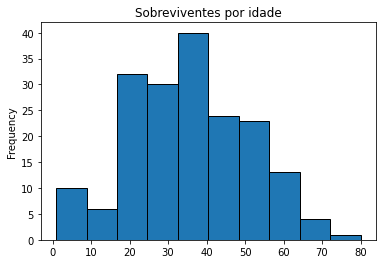

In [26]:
# Plotando histogramas para verificar a  relação de número de sobreviventes por idade
df_titanic_train['Age'].plot.hist(edgecolor='black', title= 'Sobreviventes por idade')

**Conclusão**

*Podemos observar que o maior número de sobrevivente está na faixa etária de 20 a 30 anos*

<AxesSubplot:title={'center':'Sobreviventes por classe (1ª, 2ª, 3ª)'}, ylabel='Frequency'>

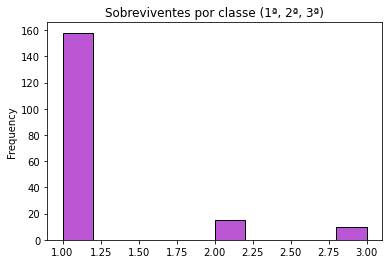

In [27]:
# Plotagem do histograma para verificar a quantidade de sobreviventes por classe econômica
df_titanic_train['Pclass'].plot.hist(edgecolor='black', title= 'Sobreviventes por classe (1ª, 2ª, 3ª)', color= '#BA55D3')

**Conclusão**

*Observa-se que o número de sobreviventes em relação a classe econômica se deu na terceira classe, ficando a primeira e seunga quase com a mesma quantidade, isto é, entre 150 e 200*

<AxesSubplot:title={'center':'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic'}, ylabel='Frequency'>

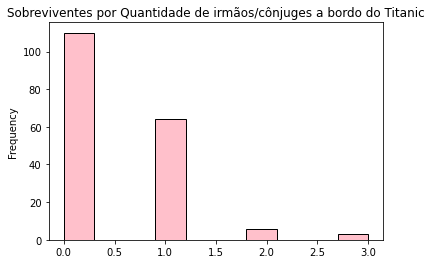

In [28]:
# Plotagem do hitograma da relação de sobreviventes por quantidade de irmãos e cônjuges
df_titanic_train['SibSp'].plot.hist(edgecolor='black', title= 'Sobreviventes por Quantidade de irmãos/cônjuges a bordo do Titanic', color= 'pink')

**Conclusão**

*Sobreviveram mais pessoas que não tinham relaçao de parentesco no nível de cônjuge ou irmãos*

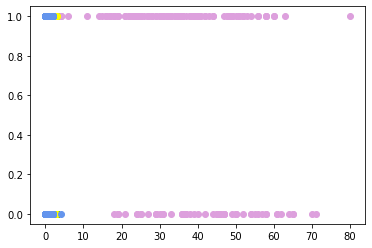

In [29]:
#gráfico de dispersão 
plt.scatter(df_titanic_train['Pclass'], df_titanic_train['Survived'], color= 'green')
plt.scatter(df_titanic_train['Age'], df_titanic_train['Survived'], color = 'Plum')
plt.scatter(df_titanic_train['SibSp'], df_titanic_train['Survived'], color = 'yellow')
plt.scatter(df_titanic_train['Parch'], df_titanic_train['Survived'], color = 'CornflowerBlue')

In [30]:
# Agrupamento por sexo para calcular a quantidade de sobreviventes. Esta forma foi escolhida pois as colunas ainda continham dados categóricos
# Mais à frente os valores categóricos serão substituidos por inteiros
colunas_selecionadas = ['Sex', 'Survived']

In [31]:
#Filtrando as colunas selecionadas no código anterior
df_titanic = df_titanic_train.filter(items=colunas_selecionadas)

In [32]:
df_titanic.head()

,Sex,Survived
1,female,1
3,female,1
6,male,0
10,female,1
11,female,1


In [33]:
df_titanic.groupby(by=["Sex"]).count()

,Survived
Sex,
female,88
male,95


In [34]:
# Exibindo as estatísticas das duas colunas filtradas no código logo enterior a este
df_titanic.groupby(by=["Sex"]).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female     88.0  0.931818  0.253502  0.0  1.0  1.0  1.0  1.0
male       95.0  0.431579  0.497924  0.0  0.0  0.0  1.0  1.0

### **Transformando os dados das colunas Sex, Embarked em int ou float**

**Atribuindo valores numéricos à coluna "Sex"**

1 = male    |    2 = female



In [35]:
df_titanic_train.loc[df_titanic_train.Sex=='male','Sex'] = 1
df_titanic_train.loc[df_titanic_train.Sex=='female','Sex'] = 2

**Atribuindo valores numéricos à coluna "Embarked"**

3 = Cherbourg | 4 = Queenstown | 5 = Southampton





In [36]:
df_titanic_train.loc[df_titanic_train.Embarked=='S','Embarked'] = 3
df_titanic_train.loc[df_titanic_train.Embarked=='C','Embarked'] = 4
df_titanic_train.loc[df_titanic_train.Embarked=='Q','Embarked'] = 5

In [37]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,2,38.0,1,0,71.2833,4
3,4,1,1,2,35.0,1,0,53.1000,3
6,7,0,1,1,54.0,0,0,51.8625,3
10,11,1,3,2,4.0,1,1,16.7000,3
11,12,1,1,2,58.0,0,0,26.5500,3


**Verificando os tipos de dados das colunas**

In [38]:
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

**Tranformando os dados das colunas Sex, Age, Embarked e Survived (`float`) em dados do tipo `int`**

In [39]:
df_titanic_train['Sex']= df_titanic_train['Sex'].astype(int)
df_titanic_train['Age']= df_titanic_train['Age'].astype(int)
df_titanic_train['Embarked'] = df_titanic_train['Embarked'].astype(int)
df_titanic_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,2,38,1,0,71.2833,4
3,4,1,1,2,35,1,0,53.1000,3
6,7,0,1,1,54,0,0,51.8625,3
10,11,1,3,2,4,1,1,16.7000,3
11,12,1,1,2,58,0,0,26.5500,3
...,...,...,...,...,...,...,...,...,...
871,872,1,1,2,47,1,1,52.5542,3
872,873,0,1,1,33,0,0,5.0000,3
879,880,1,1,2,56,0,1,83.1583,4
887,888,1,1,2,19,0,0,30.0000,3


**Histogramas**

<AxesSubplot:title={'center':'Sobreviventes por sexo'}, ylabel='Frequency'>

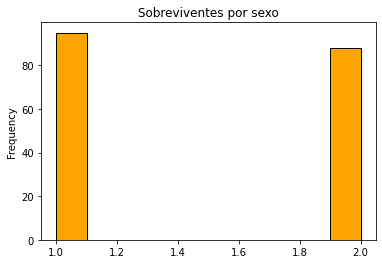

In [40]:
# plotagem do df com os sobrevivente por sexo utilizando 
df_titanic_train['Sex'].plot.hist(edgecolor='black', title= 'Sobreviventes por sexo', color= 'orange')

<AxesSubplot:title={'center':'Sobreviventes em relação ao porto de embarcação'}, ylabel='Frequency'>

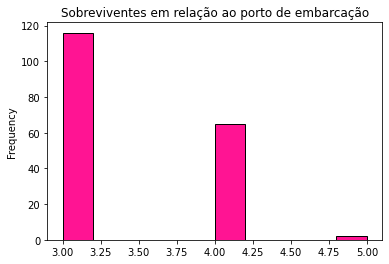

In [41]:
# Plotagem do df com os sobrevivente em relação ao porto de embarcação
df_titanic_train['Embarked'].plot.hist(edgecolor='black', title= 'Sobreviventes em relação ao porto de embarcação', color= '#FF1493')

**Dividindo o dataset em treino e teste**

In [42]:
# Separando as colunas exceto a Survived que será o y
X = df_titanic_train[df_titanic_train.columns[:-1]]
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,1,1,2,38,1,0,71.2833
3,4,1,1,2,35,1,0,53.1000
6,7,0,1,1,54,0,0,51.8625
10,11,1,3,2,4,1,1,16.7000
11,12,1,1,2,58,0,0,26.5500
...,...,...,...,...,...,...,...,...
871,872,1,1,2,47,1,1,52.5542
872,873,0,1,1,33,0,0,5.0000
879,880,1,1,2,56,0,1,83.1583
887,888,1,1,2,19,0,0,30.0000


In [43]:
# Separando os dados que irei estimar
y = df_titanic_train[df_titanic_train.columns[-1:]]

In [938]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size = 0.2, random_state=2)

In [939]:
X_test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
23,24,1,1,1,28,0,0,35.5000
745,746,0,1,1,70,1,1,71.0000
536,537,0,1,1,45,0,0,26.5500
679,680,1,1,1,36,0,1,512.3292
75,76,0,3,1,25,0,0,7.6500
209,210,1,1,1,40,0,0,31.0000
781,782,1,1,2,17,1,0,57.0000
10,11,1,3,2,4,1,1,16.7000
689,690,1,1,2,15,0,1,211.3375
262,263,0,1,1,52,1,1,79.6500


In [940]:
df_titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

**Padronizando os dados em uma mesma escala**

In [941]:
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
scaled = scaler.transform(X_test)
#X_test

3. Crie um classificador para predizer se um passageiro sobreviveu ou não a partir dos
atributos presentes no dataset. Utilize os algoritmos KNN, Regressão Logística e
Naive Bayes para criar os modelos. Crie um modelo para cada algoritmo.

4. Obtenha as métricas de avaliação de cada modelo criado (acurácia, kappa, F1, recall,
precisão, falsos positivos, falsos negativos, quantidade de instâncias classificadas
corretamente). Plote um mapa de calor exibindo a matriz de confusão de cada um dos
modelos. O que você pode inferir dos modelos a partir das métricas obtidas? Explique
suas respostas.


## KNN - K-Nearest Neighbors

In [965]:
# Instanciando o modelo 
knn = KNeighborsClassifier(n_neighbors=3)
# Treinamento do modelo
model_knn = knn.fit(X_train,y_train)
# Predição do modelo
pred_knn = model_knn.predict(X_test)
# Metrica
print("KNN:", model_knn.score(X_test, y_test))

KNN: 0.5945945945945946


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**Cáculo das todas as métricas**

In [966]:
# Cálculo de todas as métricas
print("Acurácia:", model_knn.score(X_test, y_test))
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_knn))
print("Todas:", metrics.precision_recall_fscore_support(y_test, pred_knn))

Acurácia: 0.5945945945945946
Kappa: 0.060913705583756306
Todas: (array([0.75      , 0.30769231]), array([0.66666667, 0.4       ]), array([0.70588235, 0.34782609]), array([27, 10], dtype=int64))


**Matriz de Confusão**

In [967]:
matrix_knn = metrics.confusion_matrix(y_test, pred_knn)

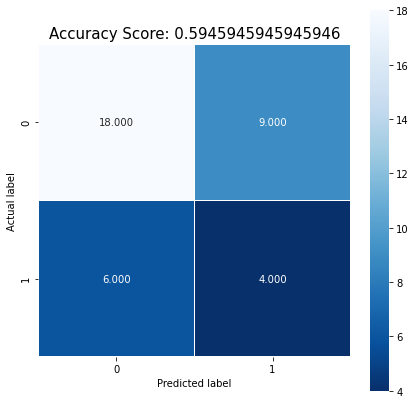

In [968]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

**Análises**

## **Regressão Logística**

In [969]:
# Instanciando o modelo 
log_reg = LogisticRegression()
# Treinamento do modelo
model_reg = log_reg.fit(X_train,y_train)
# Predição do modelo
pred_log_reg = model_reg.predict(X_test)
# Metrica
print("Regressão Logística:", model_reg.score(X_test, y_test))

Regressão Logística: 0.5945945945945946


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Cáculo das todas as métricas**

In [970]:
# Cálculo de todas as métricas
print("Acurácia:", model_reg.score(X_test, y_test))
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_log_reg))
print("Todas:", metrics.precision_recall_fscore_support(y_test, pred_log_reg))

Acurácia: 0.5945945945945946
Kappa: -0.06118546845124273
Todas: (array([0.71428571, 0.22222222]), array([0.74074074, 0.2       ]), array([0.72727273, 0.21052632]), array([27, 10], dtype=int64))


**Matriz de Confusão**

In [971]:
matrix = metrics.confusion_matrix(y_test, pred_log_reg)

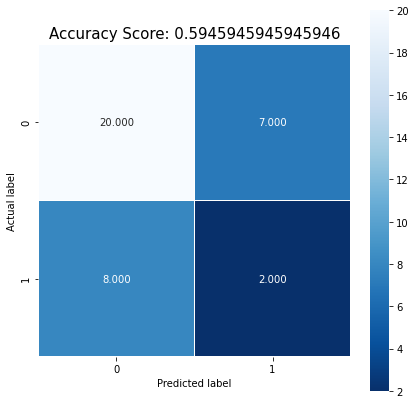

In [972]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_reg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

## **Naive Bayes**

In [973]:
# BernoulliNB (sklearn.naive_bayes.BernoulliNB)
# Instanciando o modelo
naive = MultinomialNB()
# Treinando/ajustanto o modelo
model_naive = naive.fit(X_train,y_train)
# Realizando predições
pred_naive = model_naive.predict(X_test)
# Métrica
print("Naive Bayes:", model_naive.score(X_test, y_test))

Naive Bayes: 0.32432432432432434


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**Cáculo das todas as métricas**

In [974]:
# Cálculo de todas as métricas
print("Acurácia:", model_reg.score(X_test, y_test))
print("Kappa:", metrics.cohen_kappa_score(y_test, pred_naive))
print("Todas:", metrics.precision_recall_fscore_support(y_test, pred_naive))

Acurácia: 0.5945945945945946
Kappa: 0.0064446831364124435
Todas: (array([0.71428571, 0.33333333, 0.        ]), array([0.37037037, 0.2       , 0.        ]), array([0.48780488, 0.25      , 0.        ]), array([27, 10,  0], dtype=int64))


C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Matriz de Confusão**

In [975]:
matrix_bayes = metrics.confusion_matrix(y_test, pred_naive)

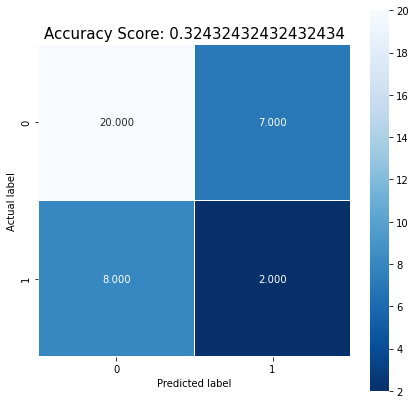

In [976]:
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model_naive.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

5. Divida os conjuntos de treino e teste usando Kfold.split. Realize os mesmos passos
dos itens 3 e 4 utilizando esses novos conjuntos

# K-FOLD - Validação Cruzada

In [977]:
def get_kfold(x,y,k,model):
    kfold = KFold(n_splits=k, shuffle=True)
    result = cross_val_score(model,x , y, cv = kfold)
    
    return result.mean()

In [978]:
kfold = KFold(n_splits=5, shuffle=True)

In [979]:
for train_idx, test_idx in kfold.split(X, y):
    print("TRAIN:", train_idx, "\nTEST:", test_idx)

TRAIN: [  0   2   4   5   7   8  10  11  12  14  15  16  17  18  19  20  21  23
  24  27  29  30  31  33  34  35  36  37  40  41  42  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  73  74  75  77  78  79  80  82  83  84  85  86  90  91
  92  93  94  95  96  97  98  99 101 102 103 104 105 108 110 111 113 114
 115 116 118 119 120 121 122 124 125 126 127 128 129 130 132 133 135 136
 137 138 140 141 142 143 144 145 146 148 149 150 152 153 154 155 156 157
 158 160 161 163 164 165 167 168 169 170 172 173 174 175 176 178 179 180
 181 182] 
TEST: [  1   3   6   9  13  22  25  26  28  32  38  39  43  69  72  76  81  87
  88  89 100 106 107 109 112 117 123 131 134 139 147 151 159 162 166 171
 177]
TRAIN: [  0   1   2   3   4   6   7   9  10  11  13  14  15  16  17  20  22  23
  24  25  26  27  28  30  32  36  37  38  39  40  41  42  43  44  46  47
  48  53  54  55  56  57  58  59  60  61  62  63  65  68  69  70  71  72
  73  74  75  

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expe

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Text(0, 0.5, 'Score')

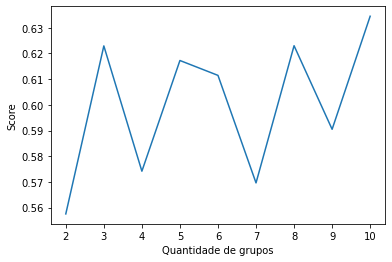

In [980]:
kfold = [get_kfold(X, y, i, knn) for i in range(2,11,1)]
plt.plot(list(range(2,11,1)), kfold)
plt.xlabel("Quantidade de grupos")
plt.ylabel("Score")

In [981]:
#seed
kfold = KFold(n_splits=5, shuffle=True, random_state=2)
result = cross_val_score(knn, X_train , y_train, cv = kfold)

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [982]:
result.mean()

0.5756321839080459

In [4]:
predicted = cross_val_predict(knn, X_train, y_train, cv=5)
predicted

NameError: name 'cross_val_predict' is not defined

In [5]:
plt.scatter(y_train, predict)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue')
plt.xlabel('Real')
plt.ylabel('Predição')
plt.show()

NameError: name 'plt' is not defined

**Regressão Logística**

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Score')

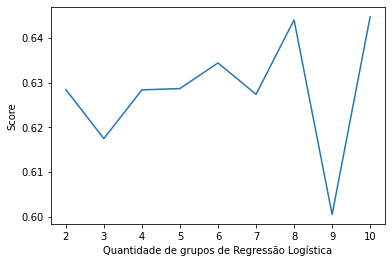

In [985]:
kfold = [get_kfold(X, y, i, log_reg) for i in range(2,11,1)]
plt.plot(list(range(2,11,1)), kfold)
plt.xlabel("Quantidade de grupos de Regressão Logística")
plt.ylabel("Score")

In [989]:
Kfold = KFold(n_splits=5, shuffle=True, random_state=2)
result = cross_val_score(log_reg,X , y, cv = kfold)
result.mean()

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

0.634084084084084

**Naive Bayes**

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Text(0, 0.5, 'Score')

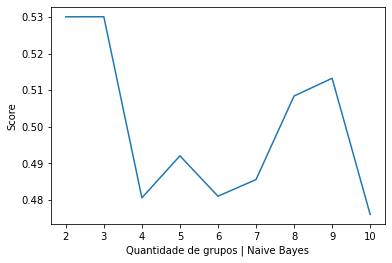

In [987]:
kfold = [get_kfold(X, y, i, naive) for i in range(2,11,1)]
plt.plot(list(range(2,11,1)), kfold)
plt.xlabel("Quantidade de grupos | Naive Bayes")
plt.ylabel("Score")

In [988]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)
result = cross_val_score(naive,X , y, cv = kfold)
result.mean()

C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\leidiana.freitas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.5144144144144145